<a href="https://colab.research.google.com/github/caraujom/Labs_IH/blob/main/Lab_Round6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


In [70]:
data=pd.read_csv('marketing_customer_analysis.csv')

In [71]:
data.shape

(9134, 24)

In [ ]:
data

In [73]:
data.columns=data.columns.str.replace(' ', '')
data

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [74]:
data.dtypes

Customer                       object
State                          object
CustomerLifetimeValue         float64
Response                       object
Coverage                       object
Education                      object
EffectiveToDate                object
EmploymentStatus               object
Gender                         object
Income                          int64
LocationCode                   object
MaritalStatus                  object
MonthlyPremiumAuto              int64
MonthsSinceLastClaim            int64
MonthsSincePolicyInception      int64
NumberofOpenComplaints          int64
NumberofPolicies                int64
PolicyType                     object
Policy                         object
RenewOfferType                 object
SalesChannel                   object
TotalClaimAmount              float64
VehicleClass                   object
VehicleSize                    object
dtype: object

In [137]:
data_numeric= data.select_dtypes(include=('int64','float64'))

data_numeric

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [ ]:
data.describe(include='object')

,Customer,State,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [104]:
data_object= data.select_dtypes(include='object')
data_object

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [76]:
data.columns

Index(['Customer', 'State', 'CustomerLifetimeValue', 'Response', 'Coverage',
       'Education', 'EffectiveToDate', 'EmploymentStatus', 'Gender', 'Income',
       'LocationCode', 'MaritalStatus', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberofOpenComplaints', 'NumberofPolicies', 'PolicyType', 'Policy',
       'RenewOfferType', 'SalesChannel', 'TotalClaimAmount', 'VehicleClass',
       'VehicleSize'],
      dtype='object')

In [77]:
data.isnull().sum()

Customer                      0
State                         0
CustomerLifetimeValue         0
Response                      0
Coverage                      0
Education                     0
EffectiveToDate               0
EmploymentStatus              0
Gender                        0
Income                        0
LocationCode                  0
MaritalStatus                 0
MonthlyPremiumAuto            0
MonthsSinceLastClaim          0
MonthsSincePolicyInception    0
NumberofOpenComplaints        0
NumberofPolicies              0
PolicyType                    0
Policy                        0
RenewOfferType                0
SalesChannel                  0
TotalClaimAmount              0
VehicleClass                  0
VehicleSize                   0
dtype: int64

In [105]:
data_object= data_object.drop(['Customer'],axis=1)
data_object

,State,Response,Coverage,Education,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [80]:
for i in data_object :

  print(data_object[i].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [97]:
data['EffectiveToDate'].dtypes

dtype('O')

In [98]:
data['EffectiveToDate']=pd.to_datetime(data['EffectiveToDate'],errors='coerce')

In [99]:
data.dtypes

Customer                              object
State                                 object
CustomerLifetimeValue                float64
Response                              object
Coverage                              object
Education                             object
EffectiveToDate               datetime64[ns]
EmploymentStatus                      object
Gender                                object
Income                                 int64
LocationCode                          object
MaritalStatus                         object
MonthlyPremiumAuto                     int64
MonthsSinceLastClaim                   int64
MonthsSincePolicyInception             int64
NumberofOpenComplaints                 int64
NumberofPolicies                       int64
PolicyType                            object
Policy                                object
RenewOfferType                        object
SalesChannel                          object
TotalClaimAmount                     float64
VehicleCla

In [100]:
data['EffectiveToDate']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: EffectiveToDate, Length: 9134, dtype: datetime64[ns]

In [ ]:
data['month']=data['EffectiveToDate'].month

AttributeError: ignored

In [ ]:
#Aplicar Lab3

In [101]:
data.dtypes

Customer                              object
State                                 object
CustomerLifetimeValue                float64
Response                              object
Coverage                              object
Education                             object
EffectiveToDate               datetime64[ns]
EmploymentStatus                      object
Gender                                object
Income                                 int64
LocationCode                          object
MaritalStatus                         object
MonthlyPremiumAuto                     int64
MonthsSinceLastClaim                   int64
MonthsSincePolicyInception             int64
NumberofOpenComplaints                 int64
NumberofPolicies                       int64
PolicyType                            object
Policy                                object
RenewOfferType                        object
SalesChannel                          object
TotalClaimAmount                     float64
VehicleCla

In [106]:
data_object

,State,Response,Coverage,Education,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [107]:
data.describe(include='all')

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
first,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN


<Axes: >

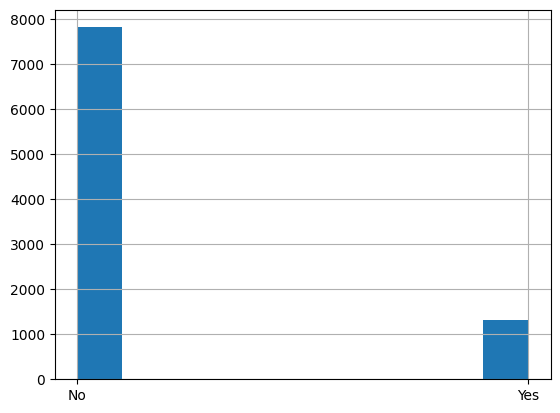

In [ ]:
data['Response'].hist()

<Axes: xlabel='Response', ylabel='count'>

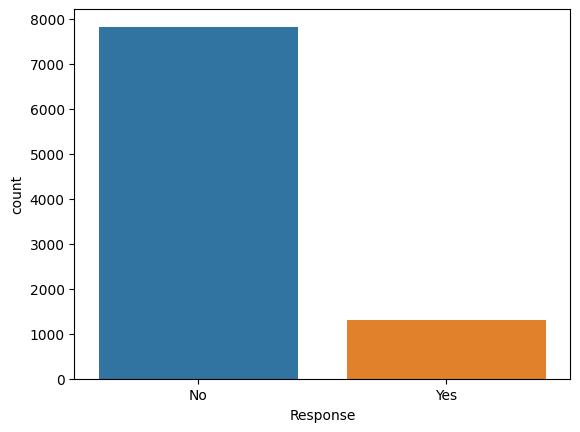

In [64]:
sns.countplot(x=data['Response'])

In [ ]:
data['SalesChannel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

<Axes: >

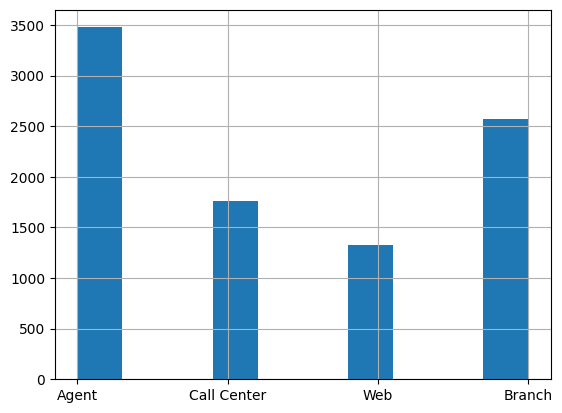

In [ ]:
data['SalesChannel'].hist()

<Axes: >

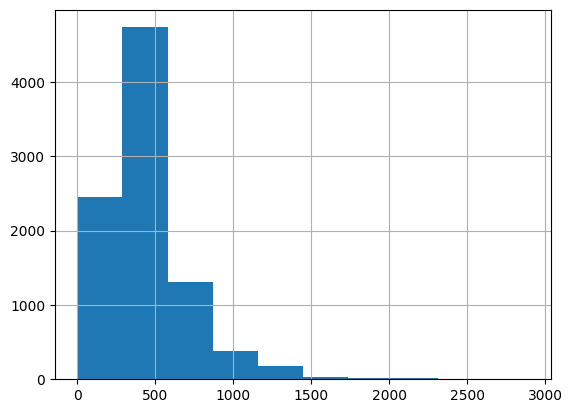

In [ ]:
data['TotalClaimAmount'].hist()

<Axes: >

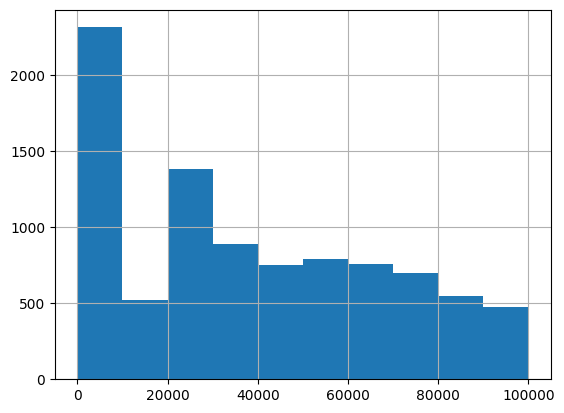

In [ ]:
data['Income'].hist()

In [83]:
#Processing Data X-y spli
data_numeric

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [84]:
#Transformar columnas numericas 
y=data_numeric['TotalClaimAmount']

In [119]:
X_num= data_numeric.drop(['TotalClaimAmount'],axis=1)

In [120]:
transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)

<Axes: ylabel='Density'>

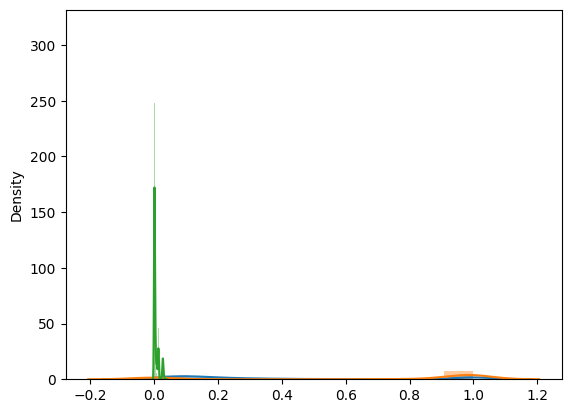

In [121]:
sns.distplot(x_norm.T[0])
sns.distplot(x_norm.T[1])
sns.distplot(x_norm.T[2])


In [ ]:
X_num

In [116]:
transformer=StandardScaler().fit(X_num)
x_standardized=transformer.transform(X_num)

In [117]:
x_standardized

array([[-0.76287773,  0.61282744, -0.70392465, ..., -1.54328695,
        -0.42224956, -0.82264788],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.21733419,
        -0.42224956,  2.10615996],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.36068043,
        -0.42224956, -0.40424676],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ..., -0.39651699,
         2.87324529, -0.40424676],
       [-0.06993547, -0.51735647,  0.08082028, ..., -1.61496007,
        -0.42224956,  0.01415436],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.50282075,
        -0.42224956, -0.82264788]])

<Axes: ylabel='Density'>

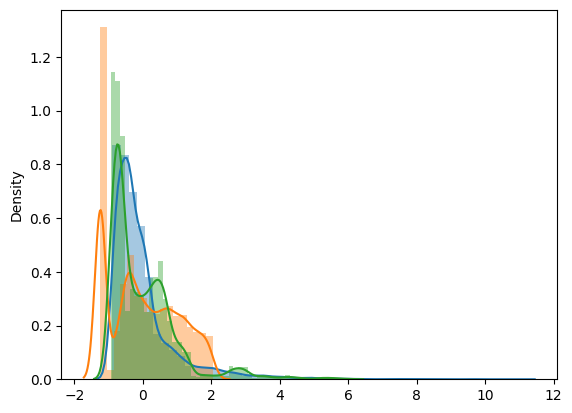

In [118]:
sns.distplot(x_standardized.T[0])
sns.distplot(x_standardized.T[1])
sns.distplot(x_standardized.T[2])


In [123]:
#Transformar Columnas categoricas
data_object.isna().sum()

State               0
Response            0
Coverage            0
Education           0
EmploymentStatus    0
Gender              0
LocationCode        0
MaritalStatus       0
PolicyType          0
Policy              0
RenewOfferType      0
SalesChannel        0
VehicleClass        0
VehicleSize         0
dtype: int64

In [126]:
encoder=OneHotEncoder(drop='first').fit(data_object)
encoded=encoder.transform(data_object).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [127]:
le=LabelEncoder().fit(data_object).transform(data_object)
#data_object.apply(LabelEncoder().fit_transform)

ValueError: ignored

In [128]:
#Unir DF transformados
X=np.concatenate((x_standardized,encoded),axis=1)

In [129]:
#entrenar modelo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=195)

In [130]:
from sklearn import linear_model
lm=linear_model.LinearRegression().fit(X_train,y_train)

In [131]:
predictions=lm.predict(X_train)

In [132]:
r2_score(y_train,predictions)

0.7763847865679709

In [133]:
predictions=lm.predict(X_test)

In [134]:
r2_score(y_test,predictions)

0.7568437206357449